In [1]:
import os
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from parse import *
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RandomForest
import random
from sklearn import linear_model
from datetime import datetime
import gc

pd.set_option("display.max_columns", 2000)


In [3]:
CHUNKSIZE = 100000

TRAIN_DATE        = "train_date.csv"
TRAIN_NUMERIC     = "train_numeric.csv"
TRAIN_CATEGORICAL = "train_categorical.csv"
TEST_DATE         = "test_date.csv"
TEST_NUMERIC      = "test_numeric.csv"
TEST_CATEGORICAL  = "test_categorical.csv"

SEED = 0
CHUNKSIZE = 50000
NROWS = 1200000

ID_COLUMN = 'Id'
TARGET_COLUMN = 'Response'
 

In [15]:
CHUNK_SIZE = 10000

start = datetime.now()

reader_date = pd.read_csv("train_date.csv",chunksize=CHUNK_SIZE, dtype=np.float32)
reader_num = pd.read_csv("train_numeric.csv",chunksize=CHUNK_SIZE, dtype=np.float32)

#分割して読み込み
loop = 0
cnt_0 = 0
cnt_1 = 0
for df_chunk_date in reader_date:
    df_chunk_num = reader_num.get_chunk(CHUNK_SIZE)
    
    df_chunk = pd.merge(on="Id", left=df_chunk_date, right=df_chunk_num)
    ## 多数側データをアンダーサンプリング
    df_0 = df_chunk[df_chunk['Response'] == 0]
    df_1 = df_chunk[df_chunk['Response'] == 1]
    cnt_0 = cnt_0 + len(df_0.index)
    cnt_1 = cnt_1 + len(df_0.index)
    df_0 = df_0.sample(n = len(df_1.index) * 20, axis=0, random_state=1)
    if loop == 0:
        df = pd.concat([df_0, df_1])
    else:
        df = pd.concat([df, df_0, df_1])
    
    print("loop : {} / Rows = {}".format(loop, len(df.index)))

    loop = loop + 1
    
print("0:{}, 1:{}".format(cnt_0, cnt_1))
print("{} -> {}".format(start, datetime.now()))
print("Memory:{}".format(df.memory_usage(index=True).sum()))

loop : 0 / Rows = 1113
loop : 1 / Rows = 2352
loop : 2 / Rows = 3549
loop : 3 / Rows = 4599
loop : 4 / Rows = 5691
loop : 5 / Rows = 6783
loop : 6 / Rows = 8064
loop : 7 / Rows = 9303
loop : 8 / Rows = 10794
loop : 9 / Rows = 11928
loop : 10 / Rows = 13167
loop : 11 / Rows = 14280
loop : 12 / Rows = 15078
loop : 13 / Rows = 16380
loop : 14 / Rows = 17535
loop : 15 / Rows = 18543
loop : 16 / Rows = 20118
loop : 17 / Rows = 21546
loop : 18 / Rows = 22617
loop : 19 / Rows = 23709
loop : 20 / Rows = 24864
loop : 21 / Rows = 25809
loop : 22 / Rows = 26670
loop : 23 / Rows = 27825
loop : 24 / Rows = 29610
loop : 25 / Rows = 30744
loop : 26 / Rows = 31899
loop : 27 / Rows = 33348
loop : 28 / Rows = 34566
loop : 29 / Rows = 35595
loop : 30 / Rows = 36876
loop : 31 / Rows = 38262
loop : 32 / Rows = 39501
loop : 33 / Rows = 40803
loop : 34 / Rows = 42021
loop : 35 / Rows = 43596
loop : 36 / Rows = 44625
loop : 37 / Rows = 45822
loop : 38 / Rows = 47334
loop : 39 / Rows = 48636
loop : 40 / Rows =

In [5]:
df.head()

Id     L0_S0_D1     L0_S0_D3     L0_S0_D5     L0_S0_D7     L0_S0_D9  \
0   4.0    82.239998    82.239998    82.239998    82.239998    82.239998   
1   6.0          NaN          NaN          NaN          NaN          NaN   
2   7.0  1618.699951  1618.699951  1618.699951  1618.699951  1618.699951   
3   9.0  1149.199951  1149.199951  1149.199951  1149.199951  1149.199951   
4  11.0   602.640015   602.640015   602.640015   602.640015   602.640015   

     L0_S0_D11    L0_S0_D13    L0_S0_D15    L0_S0_D17    L0_S0_D19  \
0    82.239998    82.239998    82.239998    82.239998    82.239998   
1          NaN          NaN          NaN          NaN          NaN   
2  1618.699951  1618.699951  1618.699951  1618.699951  1618.699951   
3  1149.199951  1149.199951  1149.199951  1149.199951  1149.199951   
4   602.640015   602.640015   602.640015   602.640015   602.640015   

     L0_S0_D21    L0_S0_D23    L0_S1_D26    L0_S1_D30    L0_S2_D34  \
0    82.239998    82.239998    82.239998    82.239998    82.239998   
1          NaN          NaN          NaN          NaN          NaN   
2  1618.699951  1618.699951  1618.699951  1618.699951  1618.699951   
3  1149.199951  1149.199951  1149.199951  1149.199951  1149.209961   
4   602.640015   602.640015   602.640015   602.640015          NaN   

     L0_S2_D38    L0_S2_D42    L0_S2_D46    L0_S2_D50    L0_S2_D54  \
0    82.239998    82.239998    82.239998    82.239998    82.239998   
1          NaN          NaN          NaN          NaN          NaN   
2  1618.699951  1618.699951  1618.699951  1618.699951  1618.699951   
3  1149.209961  1149.209961  1149.209961  1149.209961  1149.209961   
4          NaN          NaN          NaN          NaN          NaN   

     L0_S2_D58    L0_S2_D62    L0_S2_D66   L0_S3_D70   L0_S3_D74   L0_S3_D78  \
0    82.239998    82.239998    82.239998         NaN         NaN         NaN   
1          NaN          NaN          NaN         NaN         NaN         NaN   
2  1618.699951  1618.699951  1618.699951         NaN         NaN         NaN   
3  1149.209961  1149.209961  1149.209961         NaN         NaN         NaN   
4          NaN          NaN          NaN  602.640015  602.640015  602.640015   

    L0_S3_D82   L0_S3_D86   L0_S3_D90   L0_S3_D94   L0_S3_D98  L0_S3_D102  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4  602.640015  602.640015  602.640015  602.640015  602.640015  602.640015   

    L0_S4_D106   L0_S4_D111   L0_S5_D115   L0_S5_D117   L0_S6_D120  \
0    82.260002    82.260002          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN  1618.719971  1618.719971  1618.719971   
3  1149.219971  1149.219971          NaN          NaN          NaN   
4   602.659973   602.659973          NaN          NaN          NaN   

    L0_S6_D124   L0_S6_D127   L0_S6_D130   L0_S6_D134   L0_S7_D137  \
0          NaN          NaN          NaN          NaN    82.260002   
1          NaN          NaN          NaN          NaN          NaN   
2  1618.719971  1618.719971  1618.719971  1618.719971          NaN   
3          NaN          NaN          NaN          NaN  1149.219971   
4          NaN          NaN          NaN          NaN   602.669983   

    L0_S7_D139   L0_S7_D140   L0_S7_D141   L0_S7_D143   L0_S8_D145  \
0    82.260002    82.260002    82.260002    82.260002    82.269997   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN  1618.729980   
3  1149.219971  1149.219971  1149.219971  1149.219971  1149.219971   
4   602.669983   602.669983   602.669983   602.669983   602.669983   

    L0_S8_D147   L0_S8_D148   L0_S8_D150  L0_S9_D152  L0_S9_D157  L0_S9_D162  

In [17]:
STATION_NUM = 52

date_cols = df.columns

date_feature_list = []

for cur_station_id in range(STATION_NUM):
    date_feature_list_one = []
    for column_name in date_cols:
        if column_name != 'Id':
            r = parse("L{}_S{}_D{}", column_name)
            if r is not None:
                col_line_id    = int(r[0])
                col_station_id = int(r[1])
                
                if cur_station_id == col_station_id:
                    date_feature_list_one.append(column_name)

    date_feature_list.append(date_feature_list_one)

stations_top = []
for st in date_feature_list:
    stations_top.append(st[0])

stations_top

['L0_S0_D1',
 'L0_S1_D26',
 'L0_S2_D34',
 'L0_S3_D70',
 'L0_S4_D106',
 'L0_S5_D115',
 'L0_S6_D120',
 'L0_S7_D137',
 'L0_S8_D145',
 'L0_S9_D152',
 'L0_S10_D216',
 'L0_S11_D280',
 'L0_S12_D331',
 'L0_S13_D355',
 'L0_S14_D360',
 'L0_S15_D395',
 'L0_S16_D423',
 'L0_S17_D432',
 'L0_S18_D437',
 'L0_S19_D454',
 'L0_S20_D462',
 'L0_S21_D469',
 'L0_S22_D543',
 'L0_S23_D617',
 'L1_S24_D677',
 'L1_S25_D1854',
 'L2_S26_D3037',
 'L2_S27_D3130',
 'L2_S28_D3223',
 'L3_S29_D3316',
 'L3_S30_D3496',
 'L3_S31_D3836',
 'L3_S32_D3852',
 'L3_S33_D3856',
 'L3_S34_D3875',
 'L3_S35_D3886',
 'L3_S36_D3919',
 'L3_S37_D3942',
 'L3_S38_D3953',
 'L3_S39_D3966',
 'L3_S40_D3981',
 'L3_S41_D3997',
 'L3_S42_D4029',
 'L3_S43_D4062',
 'L3_S44_D4101',
 'L3_S45_D4125',
 'L3_S46_D4135',
 'L3_S47_D4140',
 'L3_S48_D4194',
 'L3_S49_D4208',
 'L3_S50_D4242',
 'L3_S51_D4255']

In [18]:
df_date_ave = df.loc[:, stations_top]
df_date_aved = np.mean(df_date_ave, axis=1)
print(df_date_aved.head)
df_L3_S32 = df.loc[:, ['L3_S32_D3852']]
df_L3_S32['date_mean'] = df_date_aved
df_L3_S32.head()

<bound method NDFrame.head of 8120     555.255432
3080     558.025024
7046     772.714294
5544     346.061523
1089     960.629944
4940    1444.330078
5682    1631.864502
4260     803.108582
1177     249.487686
8404     489.173065
1271     426.449982
1756     403.210022
6186    1151.497803
8791     294.017853
6849    1232.391479
8243      58.554619
6631    1682.721436
6444    1346.282959
7481    1622.393066
7876    1661.956177
4369     117.596436
8933     396.816925
6233      68.140778
7580    1092.788452
6019    1616.452148
254     1004.935669
6303     407.332520
861      685.430725
9438    1577.057739
2850     167.137695
           ...     
268      518.114380
2309      72.776924
1275     236.620010
3268    1190.857178
1042    1151.487671
250      963.539185
336     1334.969360
633      717.105774
745      461.342499
835     1659.509155
867      568.269409
968      916.970032
1307    1364.553345
2009     636.355835
2013     255.833832
2410     715.943726
2423     607.598328
2441     7

,L3_S32_D3852,date_mean
8120,NaN,555.255432
3080,NaN,558.025024
7046,NaN,772.714294
5544,NaN,346.061523
1089,NaN,960.629944


In [19]:
df_date_ave.head()

,L0_S0_D1,L0_S1_D26,L0_S2_D34,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D137,L0_S8_D145,L0_S9_D152,L0_S10_D216,L0_S11_D280,L0_S12_D331,L0_S13_D355,L0_S14_D360,L0_S15_D395,L0_S16_D423,L0_S17_D432,L0_S18_D437,L0_S19_D454,L0_S20_D462,L0_S21_D469,L0_S22_D543,L0_S23_D617,L1_S24_D677,L1_S25_D1854,L2_S26_D3037,L2_S27_D3130,L2_S28_D3223,L3_S29_D3316,L3_S30_D3496,L3_S31_D3836,L3_S32_D3852,L3_S33_D3856,L3_S34_D3875,L3_S35_D3886,L3_S36_D3919,L3_S37_D3942,L3_S38_D3953,L3_S39_D3966,L3_S40_D3981,L3_S41_D3997,L3_S42_D4029,L3_S43_D4062,L3_S44_D4101,L3_S45_D4125,L3_S46_D4135,L3_S47_D4140,L3_S48_D4194,L3_S49_D4208,L3_S50_D4242,L3_S51_D4255
8120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554.809998,554.809998,554.820007,NaN,554.849976,NaN,NaN,554.849976,554.849976,NaN,NaN,554.849976,NaN,NaN,NaN,NaN,NaN,555.719971,555.739990,NaN,NaN,555.750000,555.750000,NaN,555.760010,555.760010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.669983,555.669983,555.669983,NaN,555.679993,NaN,555.690002,NaN,555.690002,NaN,NaN,555.690002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574.440002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,768.460022,NaN,NaN,773.409973,773.409973,NaN,NaN,773.429993,773.429993,773.429993,NaN,773.429993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5544,343.309998,343.309998,NaN,343.309998,NaN,343.320007,343.329987,NaN,343.329987,NaN,343.329987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349.250000,349.250000,NaN,NaN,349.260010,349.260010,NaN,349.269989,349.269989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1089,959.380005,959.380005,NaN,959.380005,NaN,959.400024,NaN,959.409973,959.409973,NaN,959.409973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,962.059998,962.059998,NaN,NaN,962.070007,962.070007,NaN,962.080017,962.080017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
from sklearn.model_selection import train_test_split

start = datetime.now()

## 教師データと訓練データに分離
y = df['Response']
X = df_L3_S32

## テストセットと訓練セットに分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.head())
print(y_train.head())

print(X_test.head())
print(y_test.head())

print("{} -> {}".format(start, datetime.now()))

      L3_S32_D3852    date_mean
8201           NaN  1192.057251
6451           NaN  1680.056885
1951           NaN  1060.475098
2633           NaN   199.803848
5364           NaN   581.500793
8201    0.0
6451    0.0
1951    0.0
2633    0.0
5364    0.0
Name: Response, dtype: float32
      L3_S32_D3852    date_mean
1044           NaN   174.962143
7637           NaN  1055.080078
734            NaN   557.348755
7              NaN   950.542114
8048           NaN   264.214630
1044    0.0
7637    0.0
734     0.0
7       0.0
8048    1.0
Name: Response, dtype: float32
2018-07-15 01:40:50.434437 -> 2018-07-15 01:40:50.450059


In [21]:
## 学習
import lightgbm as lgb

start = datetime.now()

clf = lgb.LGBMClassifier(metric='binary_log_loss', objective='binary', is_unbalanced=True, boosting_type='dart')
clf.fit(X_train, y_train)
print(X_train.shape)
print("{} -> {}".format(start, datetime.now()))

(96787, 2)
2018-07-15 01:40:50.465680 -> 2018-07-15 01:40:51.075236


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[0. 0. 0. ... 0. 0. 0.]
[0.06547024 0.02556038 0.05155647 ... 0.03683873 0.03894955 0.03476234]
matthews_corrcoef = [0.         0.05185199 0.10294762 0.14229445 0.14712106 0.17071599
 0.19035459 0.19439991 0.20546661 0.20566595 0.20558659 0.20528927
 0.1992896  0.19478511 0.19775813 0.19498107 0.19297749 0.1940568
 0.19180177 0.18306433 0.17519796 0.15105444 0.14062134 0.14385189
 0.13711977 0.13711977 0.12652353 0.12751425 0.12751425 0.10575413
 0.10575413 0.10575413 0.09329232 0.07165306 0.07165306 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
best threshold = 0.19


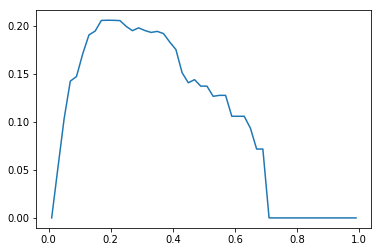

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt

start = datetime.now()

thresholds = np.linspace(0.01,0.99,50)
y_pred = clf.predict_proba(X_test.values)[:,1]
mcc = np.array([metrics.matthews_corrcoef(y_test.values, y_pred>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print(y_test.values)
print(y_pred)
print("matthews_corrcoef = {}".format(mcc))
df_pred = pd.DataFrame({'Response':y_pred})
best_thr = thresholds[mcc.argmax()]
print("best threshold = {}".format(best_thr))

In [23]:
start = datetime.now()

#特徴量重要度を表示
for i in range(0, X_train.shape[1]):
    if 0 < clf.feature_importances_[i]:
        print("{}:{}".format(X_train.columns[i], clf.feature_importances_[i]))
print("{} -> {}".format(start, datetime.now()))

L3_S32_D3852:446
date_mean:2554
2018-07-15 01:40:52.590801 -> 2018-07-15 01:40:52.590801


In [28]:
start = datetime.now()

#全訓練データを用いて再学習
clf.fit(X, y)
print("{} -> {}".format(start, datetime.now()))

2018-07-15 01:45:10.583677 -> 2018-07-15 01:45:11.395953


In [29]:
start = datetime.now()
reader_test_date = pd.read_csv("test_date.csv",chunksize=CHUNK_SIZE)
reader_test_num = pd.read_csv("test_numeric.csv",chunksize=CHUNK_SIZE)

#分割して読み込み
loop = 0
for df_chunk_test_date in reader_test_date:
    df_chunk_test_num = reader_test_num.get_chunk(CHUNK_SIZE)
    
    df_test_chunk = pd.merge(on="Id", left=df_chunk_test_date, right=df_chunk_test_num)
    df_test_id_chunk = df_test_chunk['Id']

    df_date_aved = np.mean(df_test_chunk.loc[:, stations_top], axis=1)
    df_test_chunk = df_test_chunk.loc[:, ['L3_S32_D3852']]
    df_test_chunk['date_mean'] = df_date_aved
    
    ##予測
    ary_test_chunk_pred = clf.predict(df_test_chunk.values)
    df_test_chunk_pred = pd.DataFrame({'Id':df_test_id_chunk.values, 'Response':ary_test_chunk_pred})
    if loop == 0:
        df_test_pred = df_test_chunk_pred
    else:
        df_test_pred = pd.concat([df_test_pred, df_test_chunk_pred])
    
    print("loop : {} / Rows = {}".format(loop, len(df_test_pred.index)))
    
    loop = loop + 1

df_test_pred['Response'] = df_test_pred.Response.astype('bool')
df_test_pred.head()

C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 0 / Rows = 10000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 1 / Rows = 20000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 2 / Rows = 30000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 3 / Rows = 40000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 4 / Rows = 50000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 5 / Rows = 60000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 6 / Rows = 70000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 7 / Rows = 80000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 8 / Rows = 90000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 9 / Rows = 100000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 10 / Rows = 110000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 11 / Rows = 120000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 12 / Rows = 130000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 13 / Rows = 140000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 14 / Rows = 150000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 15 / Rows = 160000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 16 / Rows = 170000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 17 / Rows = 180000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 18 / Rows = 190000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 19 / Rows = 200000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 20 / Rows = 210000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 21 / Rows = 220000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 22 / Rows = 230000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 23 / Rows = 240000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 24 / Rows = 250000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 25 / Rows = 260000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 26 / Rows = 270000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 27 / Rows = 280000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 28 / Rows = 290000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 29 / Rows = 300000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 30 / Rows = 310000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 31 / Rows = 320000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 32 / Rows = 330000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 33 / Rows = 340000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 34 / Rows = 350000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 35 / Rows = 360000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 36 / Rows = 370000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 37 / Rows = 380000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 38 / Rows = 390000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 39 / Rows = 400000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 40 / Rows = 410000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 41 / Rows = 420000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 42 / Rows = 430000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 43 / Rows = 440000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 44 / Rows = 450000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 45 / Rows = 460000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 46 / Rows = 470000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 47 / Rows = 480000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 48 / Rows = 490000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 49 / Rows = 500000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 50 / Rows = 510000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 51 / Rows = 520000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 52 / Rows = 530000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 53 / Rows = 540000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 54 / Rows = 550000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 55 / Rows = 560000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 56 / Rows = 570000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 57 / Rows = 580000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 58 / Rows = 590000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 59 / Rows = 600000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 60 / Rows = 610000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 61 / Rows = 620000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 62 / Rows = 630000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 63 / Rows = 640000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 64 / Rows = 650000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 65 / Rows = 660000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 66 / Rows = 670000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 67 / Rows = 680000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 68 / Rows = 690000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 69 / Rows = 700000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 70 / Rows = 710000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 71 / Rows = 720000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 72 / Rows = 730000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 73 / Rows = 740000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 74 / Rows = 750000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 75 / Rows = 760000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 76 / Rows = 770000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 77 / Rows = 780000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 78 / Rows = 790000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 79 / Rows = 800000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 80 / Rows = 810000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 81 / Rows = 820000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 82 / Rows = 830000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 83 / Rows = 840000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 84 / Rows = 850000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 85 / Rows = 860000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 86 / Rows = 870000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 87 / Rows = 880000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 88 / Rows = 890000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 89 / Rows = 900000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 90 / Rows = 910000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 91 / Rows = 920000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 92 / Rows = 930000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 93 / Rows = 940000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 94 / Rows = 950000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 95 / Rows = 960000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 96 / Rows = 970000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 97 / Rows = 980000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 98 / Rows = 990000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 99 / Rows = 1000000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 100 / Rows = 1010000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 101 / Rows = 1020000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 102 / Rows = 1030000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 103 / Rows = 1040000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 104 / Rows = 1050000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 105 / Rows = 1060000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 106 / Rows = 1070000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 107 / Rows = 1080000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 108 / Rows = 1090000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 109 / Rows = 1100000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 110 / Rows = 1110000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 111 / Rows = 1120000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 112 / Rows = 1130000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 113 / Rows = 1140000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 114 / Rows = 1150000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 115 / Rows = 1160000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 116 / Rows = 1170000


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


loop : 117 / Rows = 1180000
loop : 118 / Rows = 1183748


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Id,Response
0,1,False
1,2,False
2,3,False
3,5,False
4,8,False


In [30]:
##CSV出力
y_submit = df_test_pred
type(y_submit)
y_submit.to_csv("submit_date_s32.csv", columns=['Id', 'Response'], index=False)

In [31]:
y_submit.Response.sum()

1077